# Практическая работа №2
## Пример работы с растровыми данными на примере карты ЛКЗ

In [1]:
import rasterio.mask
import rasterio
from pyproj import Transformer
import osmnx as ox
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300


def get_subarray_coords_rio (arr_shape, src, trs, dest_crs = 4326):
    height = arr_shape[0]
    width = arr_shape[1]

    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(trs, rows, cols)

    xs = np.array(xs)
    ys = np.array(ys)

    trs_wgs = Transformer.from_crs (src.crs, dest_crs)
    lats, lons = trs_wgs.transform(xs,ys)
    return lats, lons

def LCZ_colormap ():
    lcz_colors = np.array ([
                 [140, 0,   0],
                 [209, 0,   0], 
                 [254, 0,   0],
                 [190, 77,  0],
                 [255, 102, 0],
                 [254, 153, 87],
                 [230, 217, 4],
                 [187, 187, 187],
                 [254, 204, 171],
                 [85,  85,  85],
                 [0,   105, 0],
                 [0,   170, 0],
                 [99,  133, 38],
                 [185, 221, 119],
                 [0,   0,   0],
                 [251, 246, 174],
                 [106, 106, 255]]) / 255
    
    return mcolors.LinearSegmentedColormap.from_list ('', lcz_colors, 17)


#### Запрос полигона для выбраной территории из OSM

In [2]:
place_name1 = "Мурманск"
area = ox.geocode_to_gdf(place_name1)


#### Чтение растровых данных для выбранной области
Считаваются данные только для прямоугольника, описанного вокруг полигона области. Акуально для работы с большими растрами, которые могут не поместиться в оперативную память. 

In [3]:
#data_path = 'PW2_data/Moscow_from_global_LCZ_map.tif'
data_path = r"G:\! Data\! Global data sets\Global LCZ map\lcz_filter_v1.tif"

src = rasterio.open (data_path)
subarray, transform = rasterio.mask.mask(src, area['geometry'], crop=True, filled=False)
lats, lons = get_subarray_coords_rio (subarray.shape[subarray.ndim-2:], src, transform)

display(subarray.shape)

RasterioIOError: G:\! Data\! Global data sets\Global LCZ map\lcz_filter_v1.tif: No such file or directory

#### Выбираем данные для отбражения и визуализируем их
В качестве примера используется фрагмент глобальной карты ЛКЗ [(Demuzere et al., 2022)](https://essd.copernicus.org/articles/14/3835/2022/) для Москвы.
Сейчас первый канал растра - данные без сглаживающей фильтрации, второй канал - с фильтрацией.

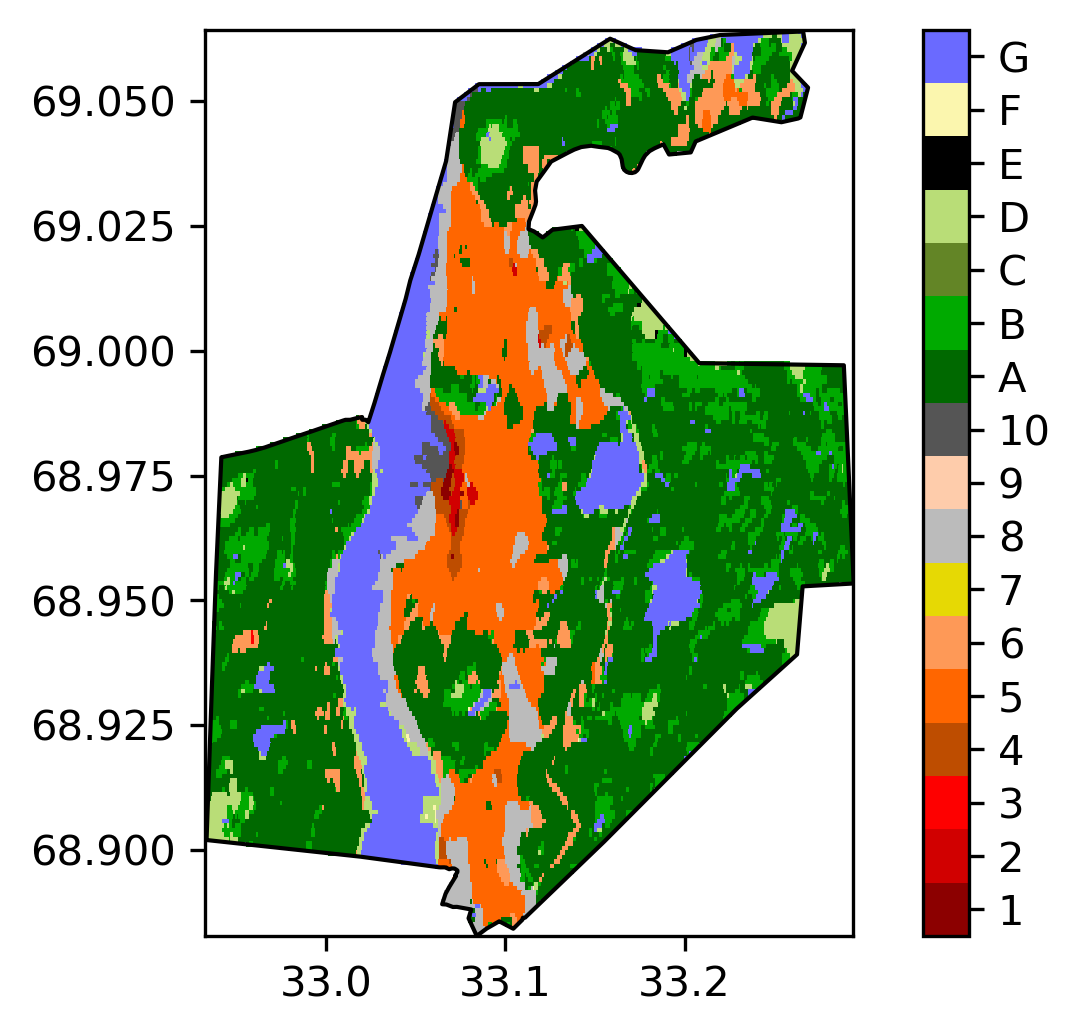

In [6]:
data2draw = subarray[0,:,:].astype(float)

plt.figure()
plt.pcolor(lats, lons, data2draw, shading='nearest', cmap = LCZ_colormap())
area.plot(ax = plt.gca(), edgecolor = 'black', facecolor = [0, 0, 0, 0])
plt.clim([0.5, 17.5])
cb = plt.colorbar (ticks = range (1,18))
cb.ax.set_yticklabels ([1,2,3,4,5,6,7,8,9,10,'A','B','C','D','E','F','G'])
plt.show()
